## Интеллектуальные системы и технологии  
Практика №5. Эволюционные алгоритмы оптимизации  
Жаров Всеволод, ИММО-01-23

In [100]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from scipy.optimize import newton
from geneticalgorithm import geneticalgorithm
from pyswarm import pso
from bees_algorithm import BeesAlgorithm
from scipy.optimize import differential_evolution

import time
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from utils.evolution import *

from utils.some_def import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier as RF

### Опимизационные функции

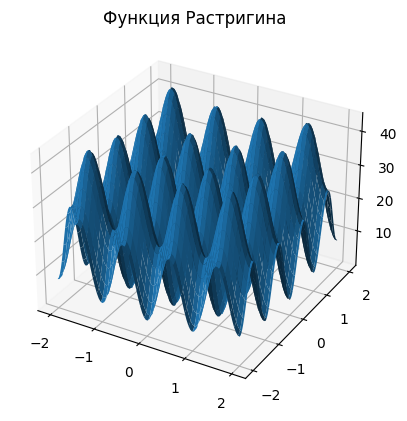

In [5]:
x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection="3d")
ax.plot_surface(X, Y, rastirigin([X, Y]))
plt.title("Функция Растригина")
plt.show()

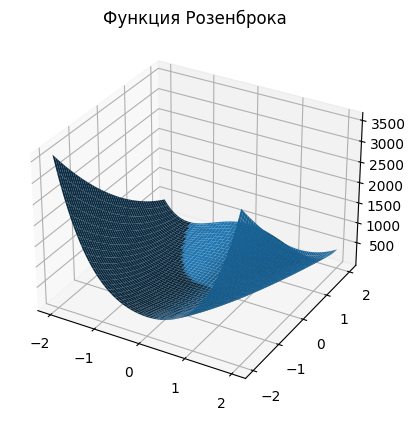

In [3]:
x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection="3d")
ax.plot_surface(X, Y, rosenbrok([X, Y]))
plt.title("Функция Розенброка")
plt.show()

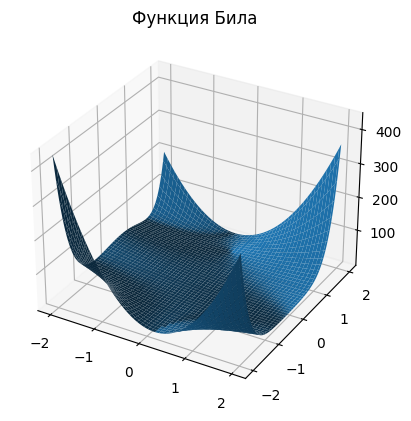

In [4]:
x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection="3d")
ax.plot_surface(X, Y, bil(X, Y))
plt.title("Функция Била")
plt.show()

### Классический алгоритм оптимизации (Ньютона)

In [17]:
random_data = np.random.randn(20, 3) * 2.25
print(random_data[:10])

[[ 5.3980799   0.02461419 -0.65457885]
 [-2.6278127  -0.26577207 -0.91954517]
 [ 0.59611031  0.61624792  1.36506155]
 [-0.24435657  1.18114621  0.93133729]
 [-0.22605134  1.27720307 -1.72415658]
 [-0.34685396 -2.84524323  0.76425472]
 [ 0.30569882 -0.94173926 -1.63462864]
 [ 2.15978752  2.29599431 -5.99202113]
 [ 2.75561035  1.98082317  2.95091706]
 [-1.09847158 -0.61061945  2.01374748]]


In [34]:
n_asnwers, n_time = make_newton(random_data, func=rosenbrok)

print(f"Среднее значение = {np.mean(n_asnwers)} (чем ближе к единице, тем лучше)")
print(f"Дисперсия = {np.var(n_asnwers)} (чем ближе к нулю, тем лучше)")
print()
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(n_time)} (чем ближе к нулю, тем лучше)")

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:16<00:00,  1.24it/s]

Среднее значение = 0.15540556179613857 (чем ближе к нулю, тем лучше)
Дисперсия = 0.37973682013130483 (чем ближе к нулю, тем лучше)

Среднее время, затраченное на выполнение алгоритма = 0.8026874899864197 (чем ближе к нулю, тем лучше)


In [10]:
random_data = np.random.randn(20, 3) * 2.0
print(random_data[:10])

[[ 1.82920277  1.27364916  0.72447748]
 [-1.70126457 -0.70680214 -0.0955129 ]
 [ 1.9839279  -1.29472857 -2.71968771]
 [ 3.27404915 -0.87199121 -2.03030955]
 [ 1.43369975 -0.80756889  2.25350621]
 [ 3.15688688  3.1479523   0.72637422]
 [ 0.83726214 -2.52748874 -1.41385773]
 [-2.29403888 -1.47914647 -0.29549329]
 [-0.51916457  0.23781466 -2.26036182]
 [ 2.69017928  0.96970908  0.94247595]]


In [11]:
n_asnwers, n_time = make_newton(random_data, func=rosenbrok)

print(f"Среднее значение = {np.mean(n_asnwers)} (чем ближе к единице, тем лучше)")
print(f"Дисперсия = {np.var(n_asnwers)} (чем ближе к нулю, тем лучше)")
print()
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(n_time)} (чем ближе к нулю, тем лучше)")

100%|██████████| 20/20 [00:19<00:00,  1.03it/s]

Среднее значение = 0.20743601702719014 (чем ближе к единице, тем лучше)
Дисперсия = 0.2615784226571781 (чем ближе к нулю, тем лучше)

Среднее время, затраченное на выполнение алгоритма = 0.9725137233734131 (чем ближе к нулю, тем лучше)


In [16]:
for i in range(10):
    print(random_data[i], "\t -> \t", n_asnwers[i])

[1.82920277 1.27364916 0.72447748] 	 -> 	 [0.7580824519993205, 0.4128583285720707, 0.07159996846314098]
[-1.70126457 -0.70680214 -0.0955129 ] 	 -> 	 [0.9999999816232064, 0.999999988394179, 0.9999999925466524]
[ 1.9839279  -1.29472857 -2.71968771] 	 -> 	 [-0.36446247204022, 0.5112528944793232, 0.20775527613217792]
[ 3.27404915 -0.87199121 -2.03030955] 	 -> 	 [-0.228866861947078, 0.6622513205351278, 0.45326503540350316]
[ 1.43369975 -0.80756889  2.25350621] 	 -> 	 [-0.15036260272764723, 0.3689533264095957, 0.1358428885946098]
[3.15688688 3.1479523  0.72637422] 	 -> 	 [0.9002744866177634, 0.8961901435664632, -0.2108072724152492]
[ 0.83726214 -2.52748874 -1.41385773] 	 -> 	 [-0.6371926105849957, 0.3034205866954458, 0.5233312629625337]
[-2.29403888 -1.47914647 -0.29549329] 	 -> 	 [0.20531774083625456, 0.4019093917619099, 0.6874640605251314]
[-0.51916457  0.23781466 -2.26036182] 	 -> 	 [0.22908164667006567, -0.3718560392338128, -0.6545099266331476]
[2.69017928 0.96970908 0.94247595] 	 -> 	 [

Проблема этого алгоритма в том, что он может не сойтись. Хотя, когда он сойдётся, не факт, что результаты будут очень хорошими

### Генетический алгоритм

In [2]:
# Границы поиска
x = np.array([[-10, 10]] * 3)

#### Модель без ограничений по итерациям

 The best solution found:                                                                           
 [0.63431168 0.4091507  0.16724607]

 Objective function:
 0.48745652408966916


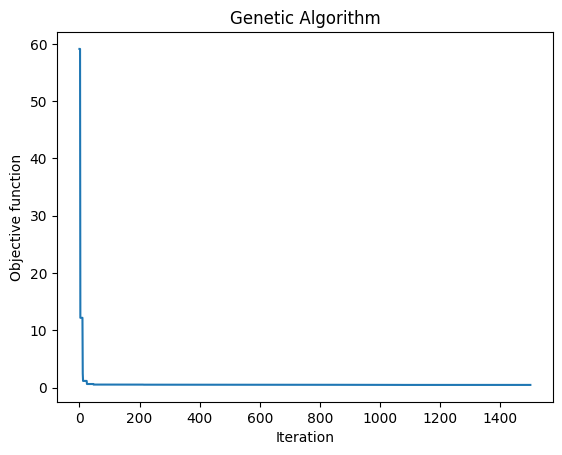

Время на все итерации эволюционного алгоритма = 177.81418538093567


In [18]:
model = geneticalgorithm(rosenbrok, dimension=3, variable_type="real", variable_boundaries=x)
start_timer = time.time()
model.run()
print(f"Время на все итерации эволюционного алгоритма = {time.time() - start_timer}")

 The best solution found:                                                                           
 [0.9035407  0.81593972 0.66583361]

 Objective function:
 0.04320305939661295


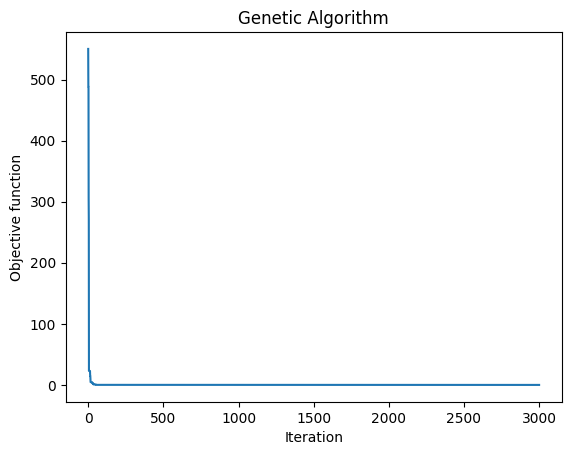

Время на все итерации эволюционного алгоритма = 100.79841327667236


In [87]:
model = geneticalgorithm(rosenbrok, dimension=3, variable_type="real", variable_boundaries=x)
start_timer = time.time()
model.run()
print(f"Время на все итерации эволюционного алгоритма = {time.time() - start_timer}")

In [86]:
print(model.param)

{'max_num_iteration': None, 'population_size': 100, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}


 The best solution found:                                                                           
 [1.05517999 1.11384973 1.23987048]

 Objective function:
 0.01608891695323559


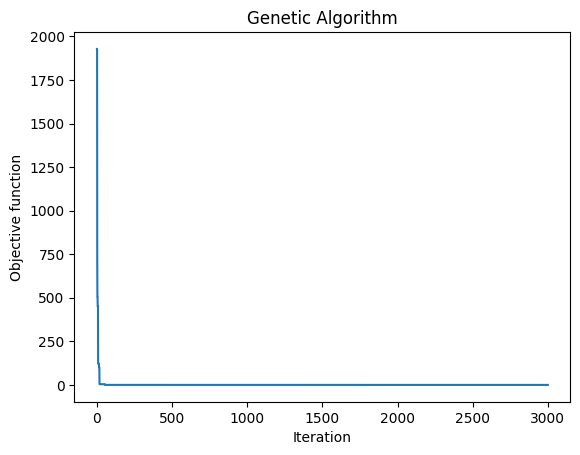

Время на все итерации эволюционного алгоритма = 106.22130918502808


In [88]:
start_timer = time.time()
model.run()
print(f"Время на все итерации эволюционного алгоритма = {time.time() - start_timer}")

Если брать полный алгоритм, не ограничивая его итерациями - то его качество описывается фразой "как пойдёт". В зависимости от первоначального, возможно, приближения (т.к. сид не определён) его качество может быть ужасным:  
- найденный х = [0.63431168 0.4091507  0.16724607] (идеальный x = [1.0, 1.0, 1.0])  
- время t = 178 секунд  

до варианта получше:  
- найденный х = [1.05517999 1.11384973 1.23987048] (идеальный x = [1.0, 1.0, 1.0])  
- время t = 106 секунд

Судя по графику, ему так много итераций, в общем-то, и не нужно. Поэтому рассмотрим вариант с ограничением количества итераций до 100

#### Модель с ограниченными итерациями = 100

 The best solution found:                                                                           
 [0.95566994 0.92877138 0.83292678]

 Objective function:
 0.11910606766396531


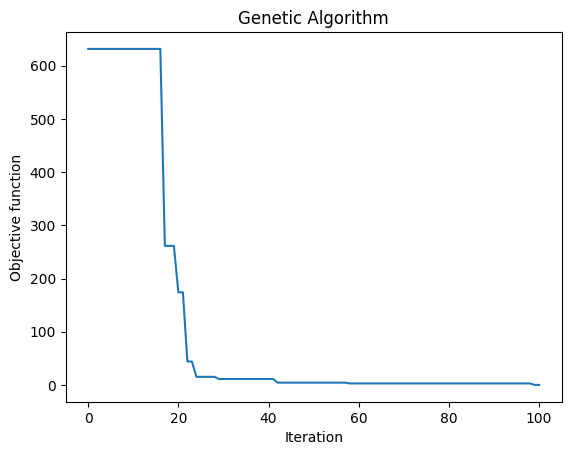

Время на 100 итераций эволюционного алгоритма = 3.9660778045654297


In [80]:
algorithm_param = {
    'max_num_iteration': 100, 
    'population_size': 100, 
    'mutation_probability': 0.1, 
    'elit_ratio': 0.01, 
    'crossover_probability': 0.5, 
    'parents_portion': 0.3, 
    'crossover_type': 'uniform', 
    'max_iteration_without_improv': None
}

model = geneticalgorithm(rosenbrok, dimension=3, variable_type="real", variable_boundaries=x, algorithm_parameters=algorithm_param)
start_timer = time.time()
model.run()
print(f"Время на 100 итераций эволюционного алгоритма = {time.time() - start_timer}")

Времи тратится намного меньше, а качество не сильно падает (особенно учитывая плавающее качество полного алгоритма)

In [3]:
ga_answers, ga_times = ga_100_run(x)

  0%|          | 0/100 [00:00<?, ?it/s]

 The best solution found:
 [1.04774544 0.98737547 1.00411584]

 Objective function:
 1.306441838290393


  1%|          | 1/100 [00:13<22:35, 13.69s/it]

 The best solution found:
 [1.54342434 2.43439028 5.95728991]

 Objective function:
 2.7219095868662304


  2%|▏         | 2/100 [00:25<20:49, 12.75s/it]

 The best solution found:
 [0.50343795 0.28547568 0.17619065]

 Objective function:
 1.7563855738809058


  3%|▎         | 3/100 [00:34<17:49, 11.02s/it]

 The best solution found:
 [0.65911487 0.43459347 0.16963678]

 Objective function:
 0.47288721125161587


  4%|▍         | 4/100 [00:38<13:10,  8.24s/it]

 The best solution found:
 [-0.86153367  0.75038976  0.55938383]

 Objective function:
 3.535624014192607


  5%|▌         | 5/100 [00:42<10:43,  6.77s/it]

 The best solution found:
 [0.71918533 0.46287044 0.18936013]

 Objective function:
 0.7247802812764883


  6%|▌         | 6/100 [00:47<09:42,  6.20s/it]

 The best solution found:
 [0.66261357 0.42884161 0.15985936]

 Objective function:
 0.5083062736235923


  7%|▋         | 7/100 [00:52<08:39,  5.59s/it]

 The best solution found:
 [0.67438355 0.38059559 0.09506383]

 Objective function:
 1.2881121668869806


  8%|▊         | 8/100 [00:59<09:08,  5.97s/it]

 The best solution found:
 [1.06450265 1.13834753 1.32780837]

 Objective function:
 0.12821462628513075


  9%|▉         | 9/100 [01:03<08:07,  5.36s/it]

 The best solution found:
 [1.14180992 1.2677081  1.5672413 ]

 Objective function:
 0.38027740162591667


 10%|█         | 10/100 [01:07<07:44,  5.16s/it]

 The best solution found:
 [1.24086381 1.54877719 2.39638664]

 Objective function:
 0.3678736265094488


 11%|█         | 11/100 [01:20<10:58,  7.40s/it]

 The best solution found:
 [1.44557501 2.0848063  4.32675649]

 Objective function:
 1.4163788148130514


 12%|█▏        | 12/100 [01:34<14:05,  9.61s/it]

 The best solution found:
 [1.08959682 1.19210936 1.4271017 ]

 Objective function:
 0.050895398108030544


 13%|█▎        | 13/100 [01:47<15:20, 10.59s/it]

 The best solution found:
 [1.27806774 1.64986708 2.72015187]

 Objective function:
 0.5269420902850672


 14%|█▍        | 14/100 [02:02<16:56, 11.81s/it]

 The best solution found:
 [1.66312844 2.75094985 7.50404955]

 Objective function:
 3.9336612315560417


 15%|█▌        | 15/100 [02:17<17:57, 12.68s/it]

 The best solution found:
 [0.61732382 0.37632988 0.13567544]

 Objective function:
 0.5412088661939491


 16%|█▌        | 16/100 [02:30<18:08, 12.96s/it]

 The best solution found:
 [0.68537937 0.47752913 0.2298462 ]

 Objective function:
 0.37834977448835805


 17%|█▋        | 17/100 [02:38<15:53, 11.48s/it]

 The best solution found:
 [-0.25709859  0.04565575 -0.01466435]

 Objective function:
 2.5609174474196


 18%|█▊        | 18/100 [02:52<16:35, 12.15s/it]

 The best solution found:
 [-1.761017    3.02763867  9.16400186]

 Objective function:
 12.276052107896994


 19%|█▉        | 19/100 [03:06<17:13, 12.76s/it]

 The best solution found:
 [0.23174774 0.04283439 0.07038617]

 Objective function:
 1.9881281281191865


 20%|██        | 20/100 [03:21<17:45, 13.32s/it]

 The best solution found:
 [0.20773441 0.05786099 0.01012695]

 Objective function:
 1.5415370242519928


 21%|██        | 21/100 [03:35<17:44, 13.47s/it]

 The best solution found:
 [0.75220119 0.5302524  0.31074909]

 Objective function:
 0.4959836813982841


 22%|██▏       | 22/100 [03:43<15:25, 11.87s/it]

 The best solution found:
 [-1.3571343   1.63732994  2.68270674]

 Objective function:
 10.143969744365911


 23%|██▎       | 23/100 [03:57<16:06, 12.55s/it]

 The best solution found:
 [0.8459517  0.66786655 0.41104037]

 Objective function:
 0.4847566937203366


 24%|██▍       | 24/100 [04:11<16:37, 13.13s/it]

 The best solution found:
 [0.47397253 0.22043783 0.06160278]

 Objective function:
 0.9031221211501488


 25%|██▌       | 25/100 [04:26<16:58, 13.57s/it]

 The best solution found:
 [1.06981835 1.26592065 1.56246496]

 Objective function:
 1.710333336098015


 26%|██▌       | 26/100 [04:41<17:08, 13.90s/it]

 The best solution found:
 [-1.20744583  1.3982543   1.94872617]

 Objective function:
 5.391569806201305


 27%|██▋       | 27/100 [04:55<17:10, 14.12s/it]

 The best solution found:
 [1.08728082 1.17374994 1.39538126]

 Objective function:
 0.07621479627379163


 28%|██▊       | 28/100 [05:07<15:55, 13.27s/it]

 The best solution found:
 [0.18096201 0.01197343 0.00348612]

 Objective function:
 1.6912922666988113


 29%|██▉       | 29/100 [05:20<15:36, 13.19s/it]

 The best solution found:
 [0.84760263 0.7054526  0.4857011 ]

 Objective function:
 0.14113457204157298


 30%|███       | 30/100 [05:34<15:56, 13.66s/it]

 The best solution found:
 [0.68012171 0.43576534 0.17226056]

 Objective function:
 0.5235926977363663


 31%|███       | 31/100 [05:49<15:58, 13.89s/it]

 The best solution found:
 [0.45322407 0.23102016 0.05825723]

 Objective function:
 0.9582595830648389


 32%|███▏      | 32/100 [06:03<16:00, 14.13s/it]

 The best solution found:
 [1.57574769 2.49191537 6.14797497]

 Objective function:
 2.9455644711881908


 33%|███▎      | 33/100 [06:17<15:30, 13.89s/it]

 The best solution found:
 [1.1038956  1.20900909 1.45757001]

 Objective function:
 0.0653579892268239


 34%|███▍      | 34/100 [06:31<15:30, 14.09s/it]

 The best solution found:
 [-1.21648769  1.5411776   2.36370196]

 Objective function:
 5.595178585639779


 35%|███▌      | 35/100 [06:46<15:25, 14.25s/it]

 The best solution found:
 [1.54454465 2.20976006 4.89531817]

 Objective function:
 4.867732313943265


 36%|███▌      | 36/100 [06:54<13:18, 12.48s/it]

 The best solution found:
 [0.54974413 0.31828903 0.11234466]

 Objective function:
 0.7054670405744843


 37%|███▋      | 37/100 [07:02<11:42, 11.15s/it]

 The best solution found:
 [ 0.54192621  0.22907223 -0.00934338]

 Objective function:
 1.603769369354324


 38%|███▊      | 38/100 [07:15<11:50, 11.46s/it]

 The best solution found:
 [1.19815353 1.41135986 1.99048338]

 Objective function:
 0.26731517714915753


 39%|███▉      | 39/100 [07:26<11:32, 11.34s/it]

 The best solution found:
 [1.01949108 1.05490518 1.12083791]

 Objective function:
 0.03397407474290565


 40%|████      | 40/100 [07:31<09:32,  9.55s/it]

 The best solution found:
 [ 0.0832874   0.03668267 -0.09387344]

 Objective function:
 2.7634908964861413


 41%|████      | 41/100 [07:35<07:38,  7.77s/it]

 The best solution found:
 [1.3277847  1.77522698 3.08422043]

 Objective function:
 1.1750635703826249


 42%|████▏     | 42/100 [07:38<06:18,  6.53s/it]

 The best solution found:
 [1.33322941 1.78817284 3.19869092]

 Objective function:
 0.7437752191154707


 43%|████▎     | 43/100 [07:42<05:19,  5.61s/it]

 The best solution found:
 [1.21774868 1.4281545  2.07914875]

 Objective function:
 0.6867782187581577


 44%|████▍     | 44/100 [07:45<04:39,  5.00s/it]

 The best solution found:
 [ 0.28902174  0.08842618 -0.0234973 ]

 Objective function:
 1.4369229584995509


 45%|████▌     | 45/100 [07:49<04:12,  4.59s/it]

 The best solution found:
 [0.8106616  0.5966562  0.43300277]

 Objective function:
 1.1577181055214023


 46%|████▌     | 46/100 [07:53<03:56,  4.38s/it]

 The best solution found:
 [1.3446121  1.95536891 3.82943368]

 Objective function:
 3.2073457539643844


 47%|████▋     | 47/100 [07:57<03:44,  4.23s/it]

 The best solution found:
 [ 0.37816632  0.13600917 -0.07248782]

 Objective function:
 1.9659090761405875


 48%|████▊     | 48/100 [08:00<03:29,  4.03s/it]

 The best solution found:
 [-1.57770289  2.49281433  6.23147276]

 Objective function:
 8.904492597023156


 49%|████▉     | 49/100 [08:04<03:19,  3.91s/it]

 The best solution found:
 [0.31982993 0.09369822 0.01961339]

 Objective function:
 1.3031357544614957


 50%|█████     | 50/100 [08:08<03:16,  3.93s/it]

 The best solution found:
 [0.81428089 0.66089869 0.44743078]

 Objective function:
 0.16127440417286198


 51%|█████     | 51/100 [08:12<03:14,  3.97s/it]

 The best solution found:
 [0.77731688 0.53206491 0.2962257 ]

 Objective function:
 0.8064554018018268


 52%|█████▏    | 52/100 [08:16<03:05,  3.87s/it]

 The best solution found:
 [0.75950504 0.43975284 0.15177106]

 Objective function:
 2.4243720721107893


 53%|█████▎    | 53/100 [08:19<02:57,  3.77s/it]

 The best solution found:
 [1.17711523 1.38381195 1.92910716]

 Objective function:
 0.1990847659235119


 54%|█████▍    | 54/100 [08:23<02:50,  3.71s/it]

 The best solution found:
 [1.19967412 1.59431125 2.55222579]

 Objective function:
 2.8092780681035894


 55%|█████▌    | 55/100 [08:26<02:44,  3.65s/it]

 The best solution found:
 [0.52678211 0.28991882 0.1131813 ]

 Objective function:
 0.8284209266939886


 56%|█████▌    | 56/100 [08:30<02:39,  3.61s/it]

 The best solution found:
 [1.54611517 2.2567944  5.11724444]

 Objective function:
 3.7229414179754503


 57%|█████▋    | 57/100 [08:33<02:33,  3.57s/it]

 The best solution found:
 [-1.51178485  2.41608017  5.84901934]

 Objective function:
 10.033036146989748


 58%|█████▊    | 58/100 [08:37<02:29,  3.57s/it]

 The best solution found:
 [1.04855118 0.92672946 0.90591598]

 Objective function:
 3.2130273738651476


 59%|█████▉    | 59/100 [08:40<02:25,  3.55s/it]

 The best solution found:
 [0.64971688 0.41523796 0.18518188]

 Objective function:
 0.48567775132609403


 60%|██████    | 60/100 [08:44<02:22,  3.55s/it]

 The best solution found:
 [1.26395323 1.58273351 2.50383355]

 Objective function:
 0.431431695992116


 61%|██████    | 61/100 [08:48<02:21,  3.63s/it]

 The best solution found:
 [2.10779713e-01 6.60504614e-02 9.43955017e-05]

 Objective function:
 1.5437049194407826


 62%|██████▏   | 62/100 [08:52<02:21,  3.74s/it]

 The best solution found:
 [1.14040728 1.29321099 1.66562974]

 Objective function:
 0.11561828958206195


 63%|██████▎   | 63/100 [08:56<02:20,  3.80s/it]

 The best solution found:
 [1.24920293 1.59181057 2.58516469]

 Objective function:
 0.7735352363233055


 64%|██████▍   | 64/100 [08:59<02:16,  3.80s/it]

 The best solution found:
 [0.39516887 0.13299438 0.03946526]

 Objective function:
 1.2186038425535122


 65%|██████▌   | 65/100 [09:04<02:18,  3.97s/it]

 The best solution found:
 [0.40397038 0.18504036 0.03428418]

 Objective function:
 1.0671455127399703


 66%|██████▌   | 66/100 [09:07<02:10,  3.84s/it]

 The best solution found:
 [0.13286977 0.00425567 0.0118043 ]

 Objective function:
 1.7752655533805821


 67%|██████▋   | 67/100 [09:11<02:03,  3.76s/it]

 The best solution found:
 [0.56733219 0.30989873 0.11675146]

 Objective function:
 0.7206702885061435


 68%|██████▊   | 68/100 [09:14<01:58,  3.71s/it]

 The best solution found:
 [1.04373592 1.05999627 1.14611842]

 Objective function:
 0.14262361652891734


 69%|██████▉   | 69/100 [09:18<01:53,  3.66s/it]

 The best solution found:
 [1.58652574 2.50801785 6.28170295]

 Objective function:
 2.6334546169989497


 70%|███████   | 70/100 [09:21<01:48,  3.63s/it]

 The best solution found:
 [1.69008371 2.85199411 8.14204405]

 Objective function:
 3.91470477107217


 71%|███████   | 71/100 [09:25<01:44,  3.61s/it]

 The best solution found:
 [1.17696735 1.43455337 2.04896423]

 Objective function:
 0.4712776592616059


 72%|███████▏  | 72/100 [09:29<01:40,  3.60s/it]

 The best solution found:
 [0.24988142 0.08776319 0.1786348 ]

 Objective function:
 4.380765927820311


 73%|███████▎  | 73/100 [09:32<01:36,  3.59s/it]

 The best solution found:
 [1.53317815 2.38664863 5.68795351]

 Objective function:
 2.343392867268071


 74%|███████▍  | 74/100 [09:36<01:32,  3.57s/it]

 The best solution found:
 [1.65885851 2.76592435 7.5891317 ]

 Objective function:
 3.947115432682699


 75%|███████▌  | 75/100 [09:39<01:28,  3.56s/it]

 The best solution found:
 [1.03066802 1.1239017  1.25766518]

 Objective function:
 0.39907170292270056


 76%|███████▌  | 76/100 [09:43<01:25,  3.54s/it]

 The best solution found:
 [1.25748802 1.59157301 2.55353597]

 Objective function:
 0.46860514866193037


 77%|███████▋  | 77/100 [09:46<01:21,  3.53s/it]

 The best solution found:
 [0.42780452 0.17496304 0.03146022]

 Objective function:
 1.0146517593549866


 78%|███████▊  | 78/100 [09:50<01:18,  3.55s/it]

 The best solution found:
 [0.4820029  0.26006563 0.13578143]

 Objective function:
 1.3571736135021668


 79%|███████▉  | 79/100 [09:53<01:14,  3.57s/it]

 The best solution found:
 [0.80573683 0.64244901 0.28639602]

 Objective function:
 1.7664531016908325


 80%|████████  | 80/100 [09:57<01:11,  3.59s/it]

 The best solution found:
 [ 0.18776302 -0.00149949 -0.00053254]

 Objective function:
 1.7978476007300002


 81%|████████  | 81/100 [10:01<01:08,  3.61s/it]

 The best solution found:
 [1.54889891 2.3112878  5.52428225]

 Objective function:
 6.112462093351333


 82%|████████▏ | 82/100 [10:05<01:05,  3.65s/it]

 The best solution found:
 [-1.7143045   2.98885181  8.95794074]

 Objective function:
 11.63413606371492


 83%|████████▎ | 83/100 [10:08<01:01,  3.62s/it]

 The best solution found:
 [1.20543472 1.6215695  2.62815692]

 Objective function:
 3.267840899076706


 84%|████████▍ | 84/100 [10:12<00:57,  3.61s/it]

 The best solution found:
 [1.02225626 1.05126631 1.05506277]

 Objective function:
 0.258022231577262


 85%|████████▌ | 85/100 [10:15<00:54,  3.64s/it]

 The best solution found:
 [0.69481311 0.43130453 0.18910863]

 Objective function:
 0.6823260835983869


 86%|████████▌ | 86/100 [10:19<00:50,  3.63s/it]

 The best solution found:
 [1.56935643 2.42458652 5.86240085]

 Objective function:
 2.5265549110521897


 87%|████████▋ | 87/100 [10:22<00:46,  3.60s/it]

 The best solution found:
 [ 0.34183045  0.11245262 -0.00497388]

 Objective function:
 1.253904046548616


 88%|████████▊ | 88/100 [10:26<00:42,  3.57s/it]

 The best solution found:
 [0.85178427 0.69325074 0.48150883]

 Objective function:
 0.2203828427727147


 89%|████████▉ | 89/100 [10:30<00:39,  3.56s/it]

 The best solution found:
 [0.68360279 0.4363989  0.16199896]

 Objective function:
 0.5942322219378285


 90%|█████████ | 90/100 [10:33<00:35,  3.56s/it]

 The best solution found:
 [0.74144484 0.55453306 0.31233775]

 Objective function:
 0.26992217270668845


 91%|█████████ | 91/100 [10:37<00:31,  3.53s/it]

 The best solution found:
 [1.48763144 2.19785715 4.83204827]

 Objective function:
 1.6959369961951392


 92%|█████████▏| 92/100 [10:40<00:28,  3.54s/it]

 The best solution found:
 [0.92244151 0.82752266 0.66318013]

 Objective function:
 0.13712081655676694


 93%|█████████▎| 93/100 [10:44<00:24,  3.55s/it]

 The best solution found:
 [0.72889296 0.62992045 0.49466285]

 Objective function:
 2.1410722623016687


 94%|█████████▍| 94/100 [10:47<00:21,  3.58s/it]

 The best solution found:
 [0.45010637 0.18614142 0.13204227]

 Objective function:
 1.9403754451612174


 95%|█████████▌| 95/100 [10:51<00:17,  3.59s/it]

 The best solution found:
 [0.69527253 0.47192801 0.2060401 ]

 Objective function:
 0.4126971706371


 96%|█████████▌| 96/100 [10:55<00:14,  3.61s/it]

 The best solution found:
 [ 0.32477772  0.08564241 -0.00172507]

 Objective function:
 1.3395379779119474


 97%|█████████▋| 97/100 [10:58<00:10,  3.60s/it]

 The best solution found:
 [-0.74991263  0.57629571  0.36247979]

 Objective function:
 3.3533064250229745


 98%|█████████▊| 98/100 [11:02<00:07,  3.59s/it]

 The best solution found:
 [0.83893641 0.7300081  0.53924222]

 Objective function:
 0.17145598555559313


 99%|█████████▉| 99/100 [11:05<00:03,  3.58s/it]

 The best solution found:
 [1.1504154  1.17694368 1.38386317]

 Objective function:
 2.2006857586987545


100%|██████████| 100/100 [11:09<00:00,  6.69s/it]


In [4]:
print(f"Среднее значение = {np.mean(ga_answers)} (чем ближе к елинице, тем лучше)")
print(f"Дисперсия = {np.var(ga_answers)} (чем ближе к нулю, тем лучше)")
print()
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(ga_times)}")

Среднее значение = 1.1654416703946149 (чем ближе к елинице, тем лучше)
Дисперсия = 2.4531522764868066 (чем ближе к нулю, тем лучше)

Среднее время, затраченное на выполнение алгоритма = 6.692329113483429


In [5]:
print(np.array(ga_answers[:10]))

[[ 1.04774544  0.98737547  1.00411584]
 [ 1.54342434  2.43439028  5.95728991]
 [ 0.50343795  0.28547568  0.17619065]
 [ 0.65911487  0.43459347  0.16963678]
 [-0.86153367  0.75038976  0.55938383]
 [ 0.71918533  0.46287044  0.18936013]
 [ 0.66261357  0.42884161  0.15985936]
 [ 0.67438355  0.38059559  0.09506383]
 [ 1.06450265  1.13834753  1.32780837]
 [ 1.14180992  1.2677081   1.5672413 ]]


Средний ответ хороший, практически единица  
А вот дисперсия проседает, 2.45, ответы могут до нуля опускться (3 измерение, 8 ответ в ячейке сверху, например)

### Алгоритм роя частиц

In [6]:
# Границы поиска
x_bottom = [-10, -10, -10]
x_top = [10, 10, 10]

In [16]:
start_timer = time.time()
x_opt, f_opt = pso(rosenbrok, x_bottom, x_top, maxiter=10000)
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {x_opt} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {f_opt} (идеальный f = 0.0)")

Stopping search: Swarm best objective change less than 1e-08
Время на выполнение алгоритма = 0.7482929229736328
Найденное значени x = [0.95278347 0.90767333 0.82363083] (идеальный x = [1, 1, 1])
Значений функции при найденном x = 0.010760889868812316 (идеальный f = 0.0)


In [17]:
start_timer = time.time()
x_opt, f_opt = pso(rosenbrok, x_bottom, x_top, maxiter=10000)
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {x_opt} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {f_opt} (идеальный f = 0.0)")

Stopping search: Swarm best objective change less than 1e-08
Время на выполнение алгоритма = 0.8664300441741943
Найденное значени x = [-1.31507789  1.73592773  3.0173714 ] (идеальный x = [1, 1, 1])
Значений функции при найденном x = 5.906939089945478 (идеальный f = 0.0)


Как опять-таки видно, алгоритм может сработать совершенно по-разному. По-этому прогоним через 100 итераций и посмотрим, какие средние у него значения

In [20]:
pso_answers, pso_func_answers, pso_time = pso_100_run(x_bottom, x_top)

  1%|          | 1/100 [00:00<01:17,  1.27it/s]

Stopping search: Swarm best objective change less than 1e-08


  2%|▏         | 2/100 [00:01<01:01,  1.60it/s]

Stopping search: Swarm best objective change less than 1e-08


  3%|▎         | 3/100 [00:02<01:10,  1.37it/s]

Stopping search: Swarm best objective change less than 1e-08


  4%|▍         | 4/100 [00:02<01:06,  1.44it/s]

Stopping search: Swarm best objective change less than 1e-08


  5%|▌         | 5/100 [00:03<01:06,  1.43it/s]

Stopping search: Swarm best objective change less than 1e-08


  6%|▌         | 6/100 [00:04<01:24,  1.11it/s]

Stopping search: Swarm best objective change less than 1e-08


  7%|▋         | 7/100 [00:05<01:13,  1.27it/s]

Stopping search: Swarm best objective change less than 1e-08


  8%|▊         | 8/100 [00:06<01:08,  1.34it/s]

Stopping search: Swarm best objective change less than 1e-08


  9%|▉         | 9/100 [00:06<01:10,  1.29it/s]

Stopping search: Swarm best objective change less than 1e-08


 10%|█         | 10/100 [00:07<01:13,  1.23it/s]

Stopping search: Swarm best objective change less than 1e-08


 11%|█         | 11/100 [00:08<01:01,  1.46it/s]

Stopping search: Swarm best objective change less than 1e-08


 12%|█▏        | 12/100 [00:09<01:07,  1.30it/s]

Stopping search: Swarm best objective change less than 1e-08


 13%|█▎        | 13/100 [00:10<01:26,  1.00it/s]

Stopping search: Swarm best objective change less than 1e-08


 14%|█▍        | 14/100 [00:12<01:38,  1.14s/it]

Stopping search: Swarm best objective change less than 1e-08


 15%|█▌        | 15/100 [00:13<01:38,  1.16s/it]

Stopping search: Swarm best objective change less than 1e-08


 16%|█▌        | 16/100 [00:14<01:26,  1.02s/it]

Stopping search: Swarm best objective change less than 1e-08


 17%|█▋        | 17/100 [00:14<01:06,  1.26it/s]

Stopping search: Swarm best objective change less than 1e-08


 18%|█▊        | 18/100 [00:15<01:04,  1.28it/s]

Stopping search: Swarm best objective change less than 1e-08


 19%|█▉        | 19/100 [00:15<00:52,  1.54it/s]

Stopping search: Swarm best objective change less than 1e-08


 20%|██        | 20/100 [00:15<00:48,  1.65it/s]

Stopping search: Swarm best objective change less than 1e-08


 21%|██        | 21/100 [00:16<00:44,  1.79it/s]

Stopping search: Swarm best objective change less than 1e-08


 22%|██▏       | 22/100 [00:16<00:41,  1.87it/s]

Stopping search: Swarm best objective change less than 1e-08


 23%|██▎       | 23/100 [00:17<00:38,  2.01it/s]

Stopping search: Swarm best objective change less than 1e-08


 24%|██▍       | 24/100 [00:17<00:36,  2.10it/s]

Stopping search: Swarm best objective change less than 1e-08


 25%|██▌       | 25/100 [00:17<00:31,  2.36it/s]

Stopping search: Swarm best objective change less than 1e-08


 26%|██▌       | 26/100 [00:18<00:29,  2.47it/s]

Stopping search: Swarm best objective change less than 1e-08


 27%|██▋       | 27/100 [00:18<00:30,  2.41it/s]

Stopping search: Swarm best objective change less than 1e-08


 28%|██▊       | 28/100 [00:19<00:29,  2.46it/s]

Stopping search: Swarm best objective change less than 1e-08


 29%|██▉       | 29/100 [00:19<00:30,  2.29it/s]

Stopping search: Swarm best objective change less than 1e-08


 30%|███       | 30/100 [00:20<00:29,  2.35it/s]

Stopping search: Swarm best objective change less than 1e-08


 31%|███       | 31/100 [00:20<00:31,  2.20it/s]

Stopping search: Swarm best objective change less than 1e-08


 32%|███▏      | 32/100 [00:20<00:29,  2.30it/s]

Stopping search: Swarm best objective change less than 1e-08


 33%|███▎      | 33/100 [00:21<00:25,  2.60it/s]

Stopping search: Swarm best objective change less than 1e-08


 34%|███▍      | 34/100 [00:21<00:27,  2.44it/s]

Stopping search: Swarm best objective change less than 1e-08


 35%|███▌      | 35/100 [00:22<00:31,  2.07it/s]

Stopping search: Swarm best objective change less than 1e-08


 36%|███▌      | 36/100 [00:22<00:28,  2.21it/s]

Stopping search: Swarm best objective change less than 1e-08


 37%|███▋      | 37/100 [00:23<00:27,  2.25it/s]

Stopping search: Swarm best objective change less than 1e-08


 38%|███▊      | 38/100 [00:23<00:26,  2.35it/s]

Stopping search: Swarm best objective change less than 1e-08


 39%|███▉      | 39/100 [00:23<00:24,  2.50it/s]

Stopping search: Swarm best objective change less than 1e-08


 40%|████      | 40/100 [00:24<00:22,  2.66it/s]

Stopping search: Swarm best objective change less than 1e-08


 41%|████      | 41/100 [00:24<00:28,  2.06it/s]

Stopping search: Swarm best objective change less than 1e-08


 42%|████▏     | 42/100 [00:25<00:26,  2.22it/s]

Stopping search: Swarm best objective change less than 1e-08


 43%|████▎     | 43/100 [00:25<00:28,  2.02it/s]

Stopping search: Swarm best objective change less than 1e-08


 44%|████▍     | 44/100 [00:26<00:28,  1.99it/s]

Stopping search: Swarm best objective change less than 1e-08


 45%|████▌     | 45/100 [00:26<00:24,  2.23it/s]

Stopping search: Swarm best objective change less than 1e-08


 46%|████▌     | 46/100 [00:28<00:39,  1.36it/s]

Stopping search: Swarm best objective change less than 1e-08


 47%|████▋     | 47/100 [00:28<00:34,  1.52it/s]

Stopping search: Swarm best objective change less than 1e-08


 48%|████▊     | 48/100 [00:29<00:30,  1.70it/s]

Stopping search: Swarm best objective change less than 1e-08


 49%|████▉     | 49/100 [00:29<00:27,  1.89it/s]

Stopping search: Swarm best objective change less than 1e-08


 50%|█████     | 50/100 [00:29<00:23,  2.14it/s]

Stopping search: Swarm best objective change less than 1e-08


 51%|█████     | 51/100 [00:30<00:25,  1.89it/s]

Stopping search: Swarm best objective change less than 1e-08


 52%|█████▏    | 52/100 [00:30<00:24,  1.97it/s]

Stopping search: Swarm best objective change less than 1e-08


 53%|█████▎    | 53/100 [00:31<00:23,  2.04it/s]

Stopping search: Swarm best objective change less than 1e-08


 54%|█████▍    | 54/100 [00:31<00:22,  2.08it/s]

Stopping search: Swarm best objective change less than 1e-08


 55%|█████▌    | 55/100 [00:32<00:19,  2.27it/s]

Stopping search: Swarm best objective change less than 1e-08


 56%|█████▌    | 56/100 [00:32<00:18,  2.36it/s]

Stopping search: Swarm best objective change less than 1e-08


 57%|█████▋    | 57/100 [00:32<00:18,  2.33it/s]

Stopping search: Swarm best objective change less than 1e-08


 58%|█████▊    | 58/100 [00:33<00:19,  2.18it/s]

Stopping search: Swarm best objective change less than 1e-08


 59%|█████▉    | 59/100 [00:34<00:23,  1.76it/s]

Stopping search: Swarm best objective change less than 1e-08


 60%|██████    | 60/100 [00:34<00:21,  1.83it/s]

Stopping search: Swarm best objective change less than 1e-08


 61%|██████    | 61/100 [00:35<00:20,  1.92it/s]

Stopping search: Swarm best objective change less than 1e-08


 62%|██████▏   | 62/100 [00:35<00:17,  2.12it/s]

Stopping search: Swarm best objective change less than 1e-08


 63%|██████▎   | 63/100 [00:36<00:16,  2.25it/s]

Stopping search: Swarm best objective change less than 1e-08


 64%|██████▍   | 64/100 [00:36<00:15,  2.27it/s]

Stopping search: Swarm best objective change less than 1e-08


 65%|██████▌   | 65/100 [00:36<00:13,  2.54it/s]

Stopping search: Swarm best objective change less than 1e-08


 66%|██████▌   | 66/100 [00:37<00:15,  2.21it/s]

Stopping search: Swarm best objective change less than 1e-08


 67%|██████▋   | 67/100 [00:37<00:15,  2.10it/s]

Stopping search: Swarm best objective change less than 1e-08


 68%|██████▊   | 68/100 [00:38<00:14,  2.27it/s]

Stopping search: Swarm best objective change less than 1e-08


 69%|██████▉   | 69/100 [00:38<00:13,  2.26it/s]

Stopping search: Swarm best objective change less than 1e-08


 70%|███████   | 70/100 [00:39<00:17,  1.75it/s]

Stopping search: Swarm best objective change less than 1e-08


 71%|███████   | 71/100 [00:39<00:13,  2.08it/s]

Stopping search: Swarm best objective change less than 1e-08


 72%|███████▏  | 72/100 [00:40<00:13,  2.12it/s]

Stopping search: Swarm best objective change less than 1e-08


 73%|███████▎  | 73/100 [00:40<00:13,  2.07it/s]

Stopping search: Swarm best objective change less than 1e-08


 74%|███████▍  | 74/100 [00:41<00:12,  2.06it/s]

Stopping search: Swarm best objective change less than 1e-08


 75%|███████▌  | 75/100 [00:41<00:11,  2.21it/s]

Stopping search: Swarm best objective change less than 1e-08


 76%|███████▌  | 76/100 [00:42<00:11,  2.15it/s]

Stopping search: Swarm best objective change less than 1e-08


 77%|███████▋  | 77/100 [00:42<00:10,  2.22it/s]

Stopping search: Swarm best objective change less than 1e-08


 79%|███████▉  | 79/100 [00:43<00:08,  2.52it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 80%|████████  | 80/100 [00:43<00:07,  2.58it/s]

Stopping search: Swarm best objective change less than 1e-08


 81%|████████  | 81/100 [00:43<00:07,  2.64it/s]

Stopping search: Swarm best objective change less than 1e-08


 82%|████████▏ | 82/100 [00:44<00:07,  2.38it/s]

Stopping search: Swarm best objective change less than 1e-08


 83%|████████▎ | 83/100 [00:45<00:07,  2.25it/s]

Stopping search: Swarm best objective change less than 1e-08


 84%|████████▍ | 84/100 [00:45<00:07,  2.15it/s]

Stopping search: Swarm best objective change less than 1e-08


 85%|████████▌ | 85/100 [00:46<00:07,  2.05it/s]

Stopping search: Swarm best objective change less than 1e-08


 86%|████████▌ | 86/100 [00:46<00:06,  2.18it/s]

Stopping search: Swarm best objective change less than 1e-08


 87%|████████▋ | 87/100 [00:46<00:05,  2.34it/s]

Stopping search: Swarm best objective change less than 1e-08


 88%|████████▊ | 88/100 [00:47<00:04,  2.51it/s]

Stopping search: Swarm best objective change less than 1e-08


 89%|████████▉ | 89/100 [00:47<00:04,  2.47it/s]

Stopping search: Swarm best objective change less than 1e-08


 90%|█████████ | 90/100 [00:47<00:03,  2.83it/s]

Stopping search: Swarm best objective change less than 1e-08


 91%|█████████ | 91/100 [00:48<00:03,  2.69it/s]

Stopping search: Swarm best objective change less than 1e-08


 92%|█████████▏| 92/100 [00:48<00:02,  2.70it/s]

Stopping search: Swarm best objective change less than 1e-08


 93%|█████████▎| 93/100 [00:48<00:02,  2.83it/s]

Stopping search: Swarm best objective change less than 1e-08


 94%|█████████▍| 94/100 [00:49<00:02,  2.72it/s]

Stopping search: Swarm best objective change less than 1e-08


 95%|█████████▌| 95/100 [00:49<00:01,  2.61it/s]

Stopping search: Swarm best objective change less than 1e-08


 96%|█████████▌| 96/100 [00:50<00:01,  2.37it/s]

Stopping search: Swarm best objective change less than 1e-08


 97%|█████████▋| 97/100 [00:50<00:01,  2.15it/s]

Stopping search: Swarm best objective change less than 1e-08


 98%|█████████▊| 98/100 [00:51<00:01,  1.88it/s]

Stopping search: Swarm best objective change less than 1e-08


 99%|█████████▉| 99/100 [00:51<00:00,  2.22it/s]

Stopping search: Swarm best objective change less than 1e-08


100%|██████████| 100/100 [00:52<00:00,  1.91it/s]

Stopping search: Swarm best objective change less than 1e-08


In [21]:
print(f"Среднее значение = {np.mean(pso_answers)} (чем ближе к елинице, тем лучше)")
print(f"Дисперсия = {np.var(pso_answers)} (чем ближе к нулю, тем лучше)")
print(f"Среднее значение вычесленнной функции = {np.mean(pso_func_answers)} (чем ближе к нулю, тем лучше)")
print()
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(pso_time)}")

Среднее значение = 0.97016798869282 (чем ближе к елинице, тем лучше)
Дисперсия = 0.6492244452037128 (чем ближе к нулю, тем лучше)
Среднее значение вычесленнной функции = 0.5155155335833406 (чем ближе к нулю, тем лучше)

Среднее время, затраченное на выполнение алгоритма = 0.5214624857902527


В данном случае, алгоритм роя частиц отработал куда лучше, чем генетический, ещё и быстрее считался

### Пчелиный алгоритм

In [22]:
# Границы поиска
x_bottom = [-10, -10, -10]
x_top = [10, 10, 10]

In [43]:
alg = BeesAlgorithm(rosenbrok_for_bees, x_bottom, x_top)

In [46]:
start_timer = time.time()
alg.performFullOptimisation(max_iteration=10000)
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {alg.best_solution.values} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {alg.best_solution.score} (идеальный f = 0.0)")

Время на выполнение алгоритма = 19.116031169891357
Найденное значени x = [0.99955109 0.99910126 0.99819727] (идеальный x = [1, 1, 1])
Значений функции при найденном x = -1.0130501250478266e-06 (идеальный f = 0.0)


In [47]:
start_timer = time.time()
alg.performFullOptimisation(max_iteration=10000, max_score=0.0)
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {alg.best_solution.values} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {alg.best_solution.score} (идеальный f = 0.0)")

Время на выполнение алгоритма = 19.73602318763733
Найденное значени x = [0.99998992 0.99997978 0.99995947] (идеальный x = [1, 1, 1])
Значений функции при найденном x = -5.115368672889714e-10 (идеальный f = 0.0)


Следующий блок я оставлю для наглядности. После кучи-кучи итераций алгоритма (как оказалось, alg запоминает всё, что было раньше, и оптимизирует, что вышло) получился идеальный ответ (общее время работы ~9 минут)

In [50]:
start_timer = time.time()
alg.performFullOptimisation(max_score=-1e-11)
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {alg.best_solution.values} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {alg.best_solution.score} (идеальный f = 0.0)")

Время на выполнение алгоритма = 0.0
Найденное значени x = [1. 1. 1.] (идеальный x = [1, 1, 1])
Значений функции при найденном x = -4.856726933582134e-26 (идеальный f = 0.0)


Теперь посмотрим, как выглядит ответ алгоритма, если ограничить его 100 итерациями

In [51]:
alg = BeesAlgorithm(rosenbrok_for_bees, x_bottom, x_top)
start_timer = time.time()
alg.performFullOptimisation(max_iteration=100)
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {alg.best_solution.values} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {alg.best_solution.score} (идеальный f = 0.0)")

Время на выполнение алгоритма = 0.23203206062316895
Найденное значени x = [0.89939153 0.80761632 0.65038108] (идеальный x = [1, 1, 1])
Значений функции при найденном x = -0.04764673906668706 (идеальный f = 0.0)


In [52]:
alg = BeesAlgorithm(rosenbrok_for_bees, x_bottom, x_top)
start_timer = time.time()
alg.performFullOptimisation(max_iteration=100)
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {alg.best_solution.values} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {alg.best_solution.score} (идеальный f = 0.0)")

Время на выполнение алгоритма = 0.27602601051330566
Найденное значени x = [0.92567228 0.85653711 0.73325616] (идеальный x = [1, 1, 1])
Значений функции при найденном x = -0.026133208893891882 (идеальный f = 0.0)


Ну, и прогоняем 100 раз это дело, чтобы посмотреть на мат. ожидание и дисперсию

In [58]:
bees_answers, bees_func_answers, bees_time = bees_100_run(x_bottom, x_top)

100%|██████████| 100/100 [00:22<00:00,  4.54it/s]


In [59]:
print(f"Среднее значение = {np.mean(bees_answers)} (чем ближе к елинице, тем лучше)")
print(f"Дисперсия = {np.var(bees_answers)} (чем ближе к нулю, тем лучше)")
print(f"Среднее значение вычесленнной функции = {np.mean(bees_func_answers)} (чем ближе к нулю, тем лучше)")
print()
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(bees_time)}")

Среднее значение = 0.8628930032669931 (чем ближе к елинице, тем лучше)
Дисперсия = 0.04869665532827276 (чем ближе к нулю, тем лучше)
Среднее значение вычесленнной функции = -0.059511182954323394 (чем ближе к нулю, тем лучше)

Среднее время, затраченное на выполнение алгоритма = 0.21616063356399537


А ответ хорош. Среднее значение меньше, чем у роя частиц, зато дисперсия маленькая и значения вычесленной функции намного ближе к идеальному нулю. А времени затрачено меньше при этом

### Алгоритм дифференциальной эволюции

In [60]:
# Границы поиска
x = [(-10, 10), (-10, 10), (-10, 10)]

In [61]:
start_timer = time.time()
result = differential_evolution(rosenbrok, x, updating="deferred")
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {result.x} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {result.fun} (идеальный f = 0.0)")

Время на выполнение алгоритма = 0.8400099277496338
Найденное значени x = [1. 1. 1.] (идеальный x = [1, 1, 1])
Значений функции при найденном x = 1.5934990285464438e-28 (идеальный f = 0.0)


In [62]:
start_timer = time.time()
result = differential_evolution(rosenbrok, x, updating="deferred")
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {result.x} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {result.fun} (идеальный f = 0.0)")

Время на выполнение алгоритма = 0.8200337886810303
Найденное значени x = [1. 1. 1.] (идеальный x = [1, 1, 1])
Значений функции при найденном x = 1.5934990285464438e-28 (идеальный f = 0.0)


In [63]:
start_timer = time.time()
result = differential_evolution(rosenbrok, x, updating="deferred")
print(f"Время на выполнение алгоритма = {time.time() - start_timer}")
print(f"Найденное значени x = {result.x} (идеальный x = [1, 1, 1])")
print(f"Значений функции при найденном x = {result.fun} (идеальный f = 0.0)")

Время на выполнение алгоритма = 0.940000057220459
Найденное значени x = [1. 1. 1.] (идеальный x = [1, 1, 1])
Значений функции при найденном x = 1.5934990285464438e-28 (идеальный f = 0.0)


Ничего себе. Заявка на победу среди всех остальных эволюционных алгоритмов!

Теперь смотрим средние значения (но, судя по всему, они будут одинаковы)

In [65]:
de_answers, de_func_answers, de_time = de_100_run(x)

100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


In [66]:
print(f"Среднее значение = {np.mean(de_answers)} (чем ближе к елинице, тем лучше)")
print(f"Дисперсия = {np.var(de_answers)} (чем ближе к нулю, тем лучше)")
print(f"Среднее значение вычесленнной функции = {np.mean(de_func_answers)} (чем ближе к нулю, тем лучше)")
print()
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(de_time)}")

Среднее значение = 1.0000000000000007 (чем ближе к елинице, тем лучше)
Дисперсия = 4.930380657631324e-32 (чем ближе к нулю, тем лучше)
Среднее значение вычесленнной функции = 1.5934990285464438e-28 (чем ближе к нулю, тем лучше)

Среднее время, затраченное на выполнение алгоритма = 0.8356829047203064


### А теперь - другие функции

#### Функция Растригина

In [2]:
x_bottom = [-5.0, -5.0, -5.0]
x_top = [5.0, 5.0, 5.0]

In [3]:
(
    # n_asnwers, n_time, 
    ga_answers, ga_times, 
    pso_answers, pso_time, 
    bees_answers, bees_time, 
    de_answers, de_time
) = all_in_one(x_bottom, x_top, func=rastirigin, bees_func=rastrigin_for_bees)

Подготовка данных
Генетический алгоритм


  0%|          | 0/100 [00:00<?, ?it/s]

 The best solution found:
 [0.00450591 0.01895617 0.00023793]

 Objective function:
 0.0751688670578794


  1%|          | 1/100 [00:03<06:15,  3.79s/it]

 The best solution found:
 [ 0.02719326 -0.00631962 -0.00134674]

 Objective function:
 0.15447744719318024


  2%|▏         | 2/100 [00:07<06:08,  3.76s/it]

 The best solution found:
 [ 4.46076444e-05 -1.10854139e-03 -4.38147765e-03]

 Objective function:
 0.004048466059813904


  3%|▎         | 3/100 [00:11<06:07,  3.79s/it]

 The best solution found:
 [-0.00205986  0.03196861  0.00418465]

 Objective function:
 0.20618601224115451


  4%|▍         | 4/100 [00:14<05:50,  3.65s/it]

 The best solution found:
 [7.17292823e-04 1.77236906e-03 1.01112153e+00]

 Objective function:
 1.0452994221173455


  5%|▌         | 5/100 [00:18<05:48,  3.66s/it]

 The best solution found:
 [-0.01645407  0.00053652  0.01491034]

 Objective function:
 0.0976970303474225


  6%|▌         | 6/100 [00:22<05:43,  3.66s/it]

 The best solution found:
 [ 0.00066499  0.01147325 -0.03036518]

 Objective function:
 0.20835701330368295


  7%|▋         | 7/100 [00:25<05:36,  3.62s/it]

 The best solution found:
 [-0.02642899  0.00331888 -0.01256893]

 Objective function:
 0.1715962975027736


  8%|▊         | 8/100 [00:29<05:31,  3.61s/it]

 The best solution found:
 [0.00182558 0.00039497 0.00949346]

 Objective function:
 0.01854837593329961


  9%|▉         | 9/100 [00:32<05:27,  3.60s/it]

 The best solution found:
 [ 0.00165355  0.00014912 -0.01018974]

 Objective function:
 0.021117763213304386


 10%|█         | 10/100 [00:36<05:22,  3.59s/it]

 The best solution found:
 [ 0.02549857 -0.02099318  0.00738787]

 Objective function:
 0.22662180521811592


 11%|█         | 11/100 [00:39<05:17,  3.57s/it]

 The best solution found:
 [ 0.00509768 -0.00983672 -0.00192256]

 Objective function:
 0.02505359352214498


 12%|█▏        | 12/100 [00:43<05:12,  3.55s/it]

 The best solution found:
 [-0.0281754  -0.00052269 -0.0018412 ]

 Objective function:
 0.1576534154001017


 13%|█▎        | 13/100 [00:47<05:09,  3.56s/it]

 The best solution found:
 [0.01104791 0.02941608 0.00102731]

 Objective function:
 0.19540213019599406


 14%|█▍        | 14/100 [00:50<05:04,  3.55s/it]

 The best solution found:
 [-0.0003091  -0.03218451  0.02499561]

 Objective function:
 0.32819396055040073


 15%|█▌        | 15/100 [00:54<05:00,  3.54s/it]

 The best solution found:
 [ 4.68436315e-04 -7.57924116e-05  4.18236739e-02]

 Objective function:
 0.34474756269540663


 16%|█▌        | 16/100 [00:57<05:02,  3.61s/it]

 The best solution found:
 [ 0.008492   -0.00255175  0.01782863]

 Objective function:
 0.07851141371215675


 17%|█▋        | 17/100 [01:01<04:58,  3.60s/it]

 The best solution found:
 [0.00761279 0.00039932 0.01044588]

 Objective function:
 0.03313383817874893


 18%|█▊        | 18/100 [01:05<04:57,  3.63s/it]

 The best solution found:
 [ 0.00109681 -0.00212313  0.00159675]

 Objective function:
 0.001637100087016563


 19%|█▉        | 19/100 [01:08<04:54,  3.64s/it]

 The best solution found:
 [-0.02659318 -0.0010197   0.00013715]

 Objective function:
 0.14004676625205548


 20%|██        | 20/100 [01:12<04:50,  3.63s/it]

 The best solution found:
 [ 0.00038182 -0.00050416 -0.01806862]

 Objective function:
 0.06471494466722305


 21%|██        | 21/100 [01:15<04:44,  3.60s/it]

 The best solution found:
 [ 0.00052263 -0.01205852 -0.00956646]

 Objective function:
 0.04699166619643336


 22%|██▏       | 22/100 [01:19<04:39,  3.58s/it]

 The best solution found:
 [ 0.00111293 -0.01566222 -0.00068771]

 Objective function:
 0.048917722609424175


 23%|██▎       | 23/100 [01:22<04:35,  3.57s/it]

 The best solution found:
 [-0.00201895 -0.99503046  0.02940731]

 Objective function:
 1.1677179929672832


 24%|██▍       | 24/100 [01:26<04:31,  3.57s/it]

 The best solution found:
 [-0.03268613 -0.00679435 -0.00036846]

 Objective function:
 0.22018097202486686


 25%|██▌       | 25/100 [01:30<04:29,  3.59s/it]

 The best solution found:
 [0.00064218 0.00016744 0.01753729]

 Objective function:
 0.06098124135989025


 26%|██▌       | 26/100 [01:33<04:25,  3.59s/it]

 The best solution found:
 [ 2.12995160e-02 -3.02749308e-05  1.38385918e-02]

 Objective function:
 0.12771183679224407


 27%|██▋       | 27/100 [01:37<04:24,  3.63s/it]

 The best solution found:
 [ 0.00440818 -0.00539867 -0.01511973]

 Objective function:
 0.05490096083815388


 28%|██▊       | 28/100 [01:41<04:19,  3.60s/it]

 The best solution found:
 [ 8.06882671e-03 -5.61634739e-02  6.59729956e-05]

 Objective function:
 0.6316441285963457


 29%|██▉       | 29/100 [01:44<04:14,  3.59s/it]

 The best solution found:
 [-0.00040642 -0.01014906 -0.00042361]

 Objective function:
 0.02047588912750342


 30%|███       | 30/100 [01:48<04:12,  3.61s/it]

 The best solution found:
 [0.01123593 0.01360185 0.03047427]

 Objective function:
 0.2451549370608177


 31%|███       | 31/100 [01:51<04:07,  3.59s/it]

 The best solution found:
 [ 0.00536989 -0.02328803  0.01607869]

 Objective function:
 0.16420408339972425


 32%|███▏      | 32/100 [01:55<04:04,  3.59s/it]

 The best solution found:
 [ 0.00145317 -0.9926597   0.00924043]

 Objective function:
 1.0148511109880296


 33%|███▎      | 33/100 [01:59<04:00,  3.60s/it]

 The best solution found:
 [ 0.00297922 -0.00531945  0.0139969 ]

 Objective function:
 0.04617022687453698


 34%|███▍      | 34/100 [02:02<03:57,  3.59s/it]

 The best solution found:
 [-0.00524794  0.0001192  -0.00205161]

 Objective function:
 0.006294911841884243


 35%|███▌      | 35/100 [02:06<03:51,  3.55s/it]

 The best solution found:
 [-0.00668112  0.00424254 -0.0085497 ]

 Objective function:
 0.02689638580068987


 36%|███▌      | 36/100 [02:09<03:48,  3.56s/it]

 The best solution found:
 [0.00181367 0.00292267 0.02194193]

 Objective function:
 0.09761391170256672


 37%|███▋      | 37/100 [02:13<03:45,  3.57s/it]

 The best solution found:
 [ 0.0003193   0.01212608 -0.00178848]

 Objective function:
 0.029782648084939467


 38%|███▊      | 38/100 [02:16<03:40,  3.56s/it]

 The best solution found:
 [ 0.00162895  0.00013616 -0.01891168]

 Objective function:
 0.07133042833464387


 39%|███▉      | 39/100 [02:20<03:37,  3.57s/it]

 The best solution found:
 [-0.00082112 -0.02015272 -0.0019695 ]

 Objective function:
 0.08128770101216176


 40%|████      | 40/100 [02:23<03:33,  3.56s/it]

 The best solution found:
 [ 0.00592312  0.00540849 -0.0006719 ]

 Objective function:
 0.012838838046018708


 41%|████      | 41/100 [02:27<03:29,  3.55s/it]

 The best solution found:
 [-0.00221766  0.0107779   0.02041145]

 Objective function:
 0.10644831217070205


 42%|████▏     | 42/100 [02:31<03:26,  3.56s/it]

 The best solution found:
 [-0.02961632  0.01931905 -0.02201048]

 Objective function:
 0.3430859149195662


 43%|████▎     | 43/100 [02:34<03:22,  3.55s/it]

 The best solution found:
 [0.00396846 0.02409048 0.00692418]

 Objective function:
 0.12742459727329702


 44%|████▍     | 44/100 [02:38<03:20,  3.58s/it]

 The best solution found:
 [-0.00230805  0.00221997  0.00465931]

 Objective function:
 0.006334774821567635


 45%|████▌     | 45/100 [02:41<03:15,  3.56s/it]

 The best solution found:
 [ 0.00844944 -0.00940868 -0.00121743]

 Objective function:
 0.03197948977859255


 46%|████▌     | 46/100 [02:45<03:11,  3.55s/it]

 The best solution found:
 [ 0.00913813 -0.0199724   0.03658179]

 Objective function:
 0.35956809639089826


 47%|████▋     | 47/100 [02:48<03:07,  3.53s/it]

 The best solution found:
 [ 0.00082537 -0.0008082  -0.00149489]

 Objective function:
 0.0007073691633756596


 48%|████▊     | 48/100 [02:52<03:04,  3.55s/it]

 The best solution found:
 [-0.00086789 -0.01205336  0.00049275]

 Objective function:
 0.028977752367111975


 49%|████▉     | 49/100 [02:55<03:01,  3.57s/it]

 The best solution found:
 [-0.00268371 -0.0349306   0.00934295]

 Objective function:
 0.2595828631148507


 50%|█████     | 50/100 [02:59<02:57,  3.55s/it]

 The best solution found:
 [-0.0104029   0.00179293 -0.00397147]

 Objective function:
 0.0252037376740617


 51%|█████     | 51/100 [03:03<02:54,  3.56s/it]

 The best solution found:
 [-0.01638898 -0.01163612 -0.00099728]

 Objective function:
 0.08020769340385314


 52%|█████▏    | 52/100 [03:06<02:49,  3.54s/it]

 The best solution found:
 [-0.04991912 -0.02047824  0.00283063]

 Objective function:
 0.5744547454773112


 53%|█████▎    | 53/100 [03:10<02:46,  3.53s/it]

 The best solution found:
 [-0.01596481 -0.00336334 -0.00410146]

 Objective function:
 0.05604781505022771


 54%|█████▍    | 54/100 [03:13<02:43,  3.56s/it]

 The best solution found:
 [ 0.00842284 -0.0081272  -0.00049446]

 Objective function:
 0.02719380746422928


 55%|█████▌    | 55/100 [03:17<02:40,  3.56s/it]

 The best solution found:
 [-0.02572335  0.01206016 -0.00018114]

 Objective function:
 0.1596775685748426


 56%|█████▌    | 56/100 [03:20<02:36,  3.55s/it]

 The best solution found:
 [ 0.00133233 -0.01105435 -0.00428351]

 Objective function:
 0.02819723556244469


 57%|█████▋    | 57/100 [03:24<02:33,  3.56s/it]

 The best solution found:
 [-0.02852102  0.00849037 -0.00674336]

 Objective function:
 0.18408521329545735


 58%|█████▊    | 58/100 [03:27<02:28,  3.55s/it]

 The best solution found:
 [-0.01299829 -0.0108977   0.00043882]

 Objective function:
 0.0570334025435848


 59%|█████▉    | 59/100 [03:31<02:24,  3.54s/it]

 The best solution found:
 [-0.00420546 -0.00830036  0.00611465]

 Objective function:
 0.02456583080906327


 60%|██████    | 60/100 [03:34<02:22,  3.55s/it]

 The best solution found:
 [-0.0105348  -0.00554709 -0.00127286]

 Objective function:
 0.02840667055696855


 61%|██████    | 61/100 [03:38<02:17,  3.53s/it]

 The best solution found:
 [-0.00044047 -0.00097195  0.01006187]

 Objective function:
 0.02028425131014444


 62%|██████▏   | 62/100 [03:41<02:14,  3.53s/it]

 The best solution found:
 [-0.01811694 -0.00168937  0.02044048]

 Objective function:
 0.148241269237662


 63%|██████▎   | 63/100 [03:45<02:10,  3.52s/it]

 The best solution found:
 [-0.00416447  0.02201231 -0.00245882]

 Objective function:
 0.10051547785387172


 64%|██████▍   | 64/100 [03:48<02:07,  3.54s/it]

 The best solution found:
 [ 0.0094661   0.07111774 -0.00596003]

 Objective function:
 1.0107274568980884


 65%|██████▌   | 65/100 [03:52<02:03,  3.52s/it]

 The best solution found:
 [-0.00031992 -0.03864887 -0.01064553]

 Objective function:
 0.31707572709727216


 66%|██████▌   | 66/100 [03:55<01:59,  3.51s/it]

 The best solution found:
 [-1.32616667e-02 -7.82169328e-05 -1.61786915e-03]

 Objective function:
 0.03535631933461403


 67%|██████▋   | 67/100 [03:59<01:55,  3.50s/it]

 The best solution found:
 [-0.00132709  0.02540085 -0.01362024]

 Objective function:
 0.16469805286085304


 68%|██████▊   | 68/100 [04:02<01:52,  3.51s/it]

 The best solution found:
 [-0.04454681  0.01423925 -0.02014968]

 Objective function:
 0.5112695297824601


 69%|██████▉   | 69/100 [04:06<01:48,  3.51s/it]

 The best solution found:
 [ 0.00051908 -0.00219782 -0.00551396]

 Objective function:
 0.007035930804256907


 70%|███████   | 70/100 [04:10<01:45,  3.52s/it]

 The best solution found:
 [-1.55390723e-02  3.18639123e-03 -2.58364454e-05]

 Objective function:
 0.049830541456717725


 71%|███████   | 71/100 [04:13<01:42,  3.52s/it]

 The best solution found:
 [-0.01048632  0.00461939 -0.00229292]

 Objective function:
 0.027056776262682547


 72%|███████▏  | 72/100 [04:17<01:38,  3.51s/it]

 The best solution found:
 [ 0.00024951 -0.02386384  0.03285104]

 Objective function:
 0.32580252823435885


 73%|███████▎  | 73/100 [04:20<01:35,  3.53s/it]

 The best solution found:
 [-0.01785566 -0.01465526  0.00714483]

 Objective function:
 0.11577551678816178


 74%|███████▍  | 74/100 [04:24<01:31,  3.54s/it]

 The best solution found:
 [ 0.00569658  0.02164994 -0.00363904]

 Objective function:
 0.10180954766615002


 75%|███████▌  | 75/100 [04:27<01:27,  3.51s/it]

 The best solution found:
 [-3.14715937e-05  6.26831734e-03  4.82478086e-02]

 Objective function:
 0.4656468346142617


 76%|███████▌  | 76/100 [04:31<01:24,  3.51s/it]

 The best solution found:
 [-0.00076027 -0.04078371  0.02042933]

 Objective function:
 0.4105845098571521


 77%|███████▋  | 77/100 [04:34<01:21,  3.53s/it]

 The best solution found:
 [-0.00360917  0.02585805 -0.00664054]

 Objective function:
 0.14354925191197054


 78%|███████▊  | 78/100 [04:38<01:17,  3.52s/it]

 The best solution found:
 [ 0.0001242  -0.00015052  0.00873207]

 Objective function:
 0.015115747550872527


 79%|███████▉  | 79/100 [04:41<01:13,  3.52s/it]

 The best solution found:
 [ 0.01215746  0.00149564 -0.00192512]

 Objective function:
 0.030457209385410522


 80%|████████  | 80/100 [04:45<01:09,  3.49s/it]

 The best solution found:
 [-8.12809884e-04  5.12234781e-03  6.80046535e-05]

 Objective function:
 0.00533165793810042


 81%|████████  | 81/100 [04:48<01:06,  3.49s/it]

 The best solution found:
 [ 0.00575345 -0.00015548 -0.00286829]

 Objective function:
 0.008195164674638988


 82%|████████▏ | 82/100 [04:52<01:03,  3.52s/it]

 The best solution found:
 [-2.93484249e-03 -1.47095793e-03 -7.39370341e-06]

 Objective function:
 0.002135878410008729


 83%|████████▎ | 83/100 [04:55<00:59,  3.50s/it]

 The best solution found:
 [ 0.03699073  0.00352322 -0.00190682]

 Objective function:
 0.27315843246899263


 84%|████████▍ | 84/100 [04:59<00:55,  3.47s/it]

 The best solution found:
 [-0.00462983  0.0016204   0.00988814]

 Objective function:
 0.024140469005075715


 85%|████████▌ | 85/100 [05:02<00:52,  3.47s/it]

 The best solution found:
 [ 0.00148072 -0.02374206  0.03377752]

 Objective function:
 0.33722574560204066


 86%|████████▌ | 86/100 [05:05<00:48,  3.46s/it]

 The best solution found:
 [-0.00360615 -0.00227103  0.01817299]

 Objective function:
 0.06898314138831907


 87%|████████▋ | 87/100 [05:09<00:45,  3.49s/it]

 The best solution found:
 [-0.00701831  0.00430042 -0.00676803]

 Objective function:
 0.022502839325241553


 88%|████████▊ | 88/100 [05:13<00:41,  3.49s/it]

 The best solution found:
 [-0.00372676 -0.02439597 -0.00892089]

 Objective function:
 0.13624825342152747


 89%|████████▉ | 89/100 [05:16<00:38,  3.50s/it]

 The best solution found:
 [-8.09900654e-03 -9.47935011e-05  7.09225436e-03]

 Objective function:
 0.02296661260651689


 90%|█████████ | 90/100 [05:20<00:35,  3.50s/it]

 The best solution found:
 [0.00619157 0.01197457 0.02028976]

 Objective function:
 0.11748311322062222


 91%|█████████ | 91/100 [05:23<00:31,  3.49s/it]

 The best solution found:
 [-0.0052353   0.00345829  0.00150998]

 Objective function:
 0.008253759693122475


 92%|█████████▏| 92/100 [05:26<00:27,  3.47s/it]

 The best solution found:
 [5.92005733e-05 1.96825859e-03 6.95220098e-04]

 Objective function:
 0.0008642811729373534


 93%|█████████▎| 93/100 [05:30<00:24,  3.46s/it]

 The best solution found:
 [-0.0275637  -0.0008568  -0.00615288]

 Objective function:
 0.15785186191166645


 94%|█████████▍| 94/100 [05:33<00:20,  3.49s/it]

 The best solution found:
 [-0.04881322  0.00567712  0.00490524]

 Objective function:
 0.4797255421643456


 95%|█████████▌| 95/100 [05:37<00:17,  3.57s/it]

 The best solution found:
 [-0.00108875 -0.00052552 -0.0023709 ]

 Objective function:
 0.0014037158682640438


 96%|█████████▌| 96/100 [05:41<00:14,  3.55s/it]

 The best solution found:
 [ 0.00582332 -0.00124374  0.00261549]

 Objective function:
 0.008382497650394782


 97%|█████████▋| 97/100 [05:44<00:10,  3.55s/it]

 The best solution found:
 [ 0.00098636 -0.00933957 -0.00068339]

 Objective function:
 0.017568271843018124


 98%|█████████▊| 98/100 [05:48<00:07,  3.55s/it]

 The best solution found:
 [-0.00113634 -0.0111378   0.00955881]

 Objective function:
 0.04293535148499217


 99%|█████████▉| 99/100 [05:51<00:03,  3.51s/it]

 The best solution found:
 [ 0.02179247 -0.99439395 -0.00296708]

 Objective function:
 1.0919102998985366


100%|██████████| 100/100 [05:55<00:00,  3.55s/it]


-----
Алгоритм роя частиц


  1%|          | 1/100 [00:00<00:17,  5.81it/s]

Stopping search: Swarm best objective change less than 1e-08


  2%|▏         | 2/100 [00:00<00:14,  6.74it/s]

Stopping search: Swarm best objective change less than 1e-08


  3%|▎         | 3/100 [00:00<00:14,  6.66it/s]

Stopping search: Swarm best objective change less than 1e-08


  4%|▍         | 4/100 [00:00<00:13,  7.07it/s]

Stopping search: Swarm best objective change less than 1e-08


  5%|▌         | 5/100 [00:00<00:12,  7.32it/s]

Stopping search: Swarm best objective change less than 1e-08


  6%|▌         | 6/100 [00:00<00:12,  7.80it/s]

Stopping search: Swarm best objective change less than 1e-08


  7%|▋         | 7/100 [00:00<00:11,  7.88it/s]

Stopping search: Swarm best objective change less than 1e-08


  8%|▊         | 8/100 [00:01<00:11,  7.78it/s]

Stopping search: Swarm best objective change less than 1e-08


  9%|▉         | 9/100 [00:01<00:11,  7.79it/s]

Stopping search: Swarm best objective change less than 1e-08


 11%|█         | 11/100 [00:01<00:14,  6.15it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 13%|█▎        | 13/100 [00:01<00:12,  6.98it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 15%|█▌        | 15/100 [00:02<00:11,  7.57it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 17%|█▋        | 17/100 [00:02<00:10,  8.13it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 19%|█▉        | 19/100 [00:02<00:09,  8.57it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 21%|██        | 21/100 [00:02<00:09,  8.28it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 23%|██▎       | 23/100 [00:03<00:09,  7.87it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 25%|██▌       | 25/100 [00:03<00:09,  8.11it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 28%|██▊       | 28/100 [00:03<00:08,  8.57it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 30%|███       | 30/100 [00:03<00:08,  8.28it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 32%|███▏      | 32/100 [00:04<00:08,  8.36it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 34%|███▍      | 34/100 [00:04<00:08,  7.76it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 36%|███▌      | 36/100 [00:04<00:08,  7.80it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 38%|███▊      | 38/100 [00:04<00:07,  7.96it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 40%|████      | 40/100 [00:05<00:07,  7.65it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 42%|████▏     | 42/100 [00:05<00:07,  8.17it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 44%|████▍     | 44/100 [00:05<00:06,  8.07it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 46%|████▌     | 46/100 [00:05<00:06,  8.34it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 48%|████▊     | 48/100 [00:06<00:06,  8.20it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 50%|█████     | 50/100 [00:06<00:06,  8.14it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 52%|█████▏    | 52/100 [00:06<00:06,  7.52it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 54%|█████▍    | 54/100 [00:06<00:06,  6.67it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 56%|█████▌    | 56/100 [00:07<00:05,  7.45it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 58%|█████▊    | 58/100 [00:07<00:05,  7.05it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 60%|██████    | 60/100 [00:07<00:05,  7.34it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 62%|██████▏   | 62/100 [00:08<00:05,  7.22it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 64%|██████▍   | 64/100 [00:08<00:04,  7.33it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 66%|██████▌   | 66/100 [00:08<00:04,  7.24it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 68%|██████▊   | 68/100 [00:08<00:04,  7.63it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 70%|███████   | 70/100 [00:09<00:04,  7.39it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 72%|███████▏  | 72/100 [00:09<00:04,  6.57it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 74%|███████▍  | 74/100 [00:09<00:03,  7.09it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 76%|███████▌  | 76/100 [00:10<00:03,  7.20it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 78%|███████▊  | 78/100 [00:10<00:03,  6.92it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 80%|████████  | 80/100 [00:10<00:02,  7.38it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 82%|████████▏ | 82/100 [00:10<00:02,  7.23it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 84%|████████▍ | 84/100 [00:11<00:02,  7.49it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 86%|████████▌ | 86/100 [00:11<00:02,  6.88it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 88%|████████▊ | 88/100 [00:11<00:01,  6.88it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 90%|█████████ | 90/100 [00:12<00:01,  6.91it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 92%|█████████▏| 92/100 [00:12<00:01,  6.75it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 94%|█████████▍| 94/100 [00:12<00:00,  6.65it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 96%|█████████▌| 96/100 [00:12<00:00,  7.23it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


 98%|█████████▊| 98/100 [00:13<00:00,  6.94it/s]

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08


100%|██████████| 100/100 [00:13<00:00,  7.41it/s]


Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
-----
Пчелиный алгоритм


100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


-----
Алгоритм дифференциальной эволюции


100%|██████████| 100/100 [00:29<00:00,  3.37it/s]

-----


In [7]:
# print("Алгоритм оптимизации Ньютона")
# print(f"Среднее значение = {np.mean(n_asnwers)} (чем ближе к единице, тем лучше)")
# print(f"Дисперсия = {np.var(n_asnwers)} (чем ближе к нулю, тем лучше)")
# print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(n_time)} (чем ближе к нулю, тем лучше)")
# print("-----")
print("Генетический алгоритм")
print(f"Среднее значение = {np.mean(ga_answers)} (чем ближе к нулю, тем лучше)")
print(f"Дисперсия = {np.var(ga_answers)} (чем ближе к нулю, тем лучше)")
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(ga_times)}")
print("-----")
print("Алгоритм роя частиц")
print(f"Среднее значение = {np.mean(pso_answers)} (чем ближе к нулю, тем лучше)")
print(f"Дисперсия = {np.var(pso_answers)} (чем ближе к нулю, тем лучше)")
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(pso_time)}")
print("-----")
print("Пчелиный алгоритм")
print(f"Среднее значение = {np.mean(bees_answers)} (чем ближе к нулю, тем лучше)")
print(f"Дисперсия = {np.var(bees_answers)} (чем ближе к нулю, тем лучше)")
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(bees_time)}")
print("-----")
print("Алгоритм дифференциальной эволюции")
print(f"Среднее значение = {np.mean(de_answers)} (чем ближе к нулю, тем лучше)")
print(f"Дисперсия = {np.var(de_answers)} (чем ближе к нулю, тем лучше)")
print(f"Среднее время, затраченное на выполнение алгоритма = {np.mean(de_time)}")

Генетический алгоритм
Среднее значение = -0.006917796122836816 (чем ближе к нулю, тем лучше)
Дисперсия = 0.013461902175941065 (чем ближе к нулю, тем лучше)
Среднее время, затраченное на выполнение алгоритма = 3.5535778522491457
-----
Алгоритм роя частиц
Среднее значение = 0.019908451528838453 (чем ближе к нулю, тем лучше)
Дисперсия = 0.3167038412817319 (чем ближе к нулю, тем лучше)
Среднее время, затраченное на выполнение алгоритма = 0.13399821996688843
-----
Пчелиный алгоритм
Среднее значение = -0.012798702649144336 (чем ближе к нулю, тем лучше)
Дисперсия = 0.37091371704698606 (чем ближе к нулю, тем лучше)
Среднее время, затраченное на выполнение алгоритма = 0.18288178205490113
-----
Алгоритм дифференциальной эволюции
Среднее значение = -3.5174460788489626e-10 (чем ближе к нулю, тем лучше)
Дисперсия = 0.01321249391278663 (чем ближе к нулю, тем лучше)
Среднее время, затраченное на выполнение алгоритма = 0.2957601594924927


Здесь, опять-таки, алгоритм дифференциальной эволюции справился лучше остальных  
Минимальную дисперсию дали генетический алгоритм и алгоритм дифференциальной эволюции  
В целом, результаты у всех стабильно получше, чем для функции Розенброка

### Собирательные таблички с результатами

#### Табличка для функции Розенброка
Маркировка (ОП) - Общий Прогон, без ограничения на итерации (или с очень большим значением)  
Маркировка (100 И) - 100 Итераций, прогон с максимальным числом итераций = 100  
Маркировка (А) - алгоритм  
В пункте Мат. ожидание (ОП) в скобочках сначало указан худший результат, потом лучший

|  Сравнительный пункт  | (А) Ньютона | Генетический (А) | (А) роя частиц | Пчелиный (А) | (А) диф. эволюции
|---|---|---|---|---|---|
|   Мат. ожидание`*` (ОП)  | [-0.15, 0.999] | [0.16, 1.05] | [3.01, 0.95] | 0.999 | 1.0 |
|       Время (ОП)      | 1.01 | 106 | 0.8 | 19 | 0.84 |
| Мат. ожидание`*` (100 И) | 0.21 | 1.16 | 0.97 | 0.86 | 1.0 |
|   Дисперсия`**` (100 И)   | 0.26 | 2.45 | 0.65 | 0.04 | 0.0 |
|     Время (100 И)     | 0.97 | 6.69 | 0.52 | 0.21 | 0.83 |

`*` - референсное значение для мат. ожидания = 1.0  
`**` - референсное значение для дисперсии = 0.0

#### Табличка для функции Растригина
Маркировка (А) - алгоритм  

|  Сравнительный пункт  | Генетический (А) | (А) роя частиц | Пчелиный (А) | (А) диф. эволюции
|---|---|---|---|---|
| Мат. ожидание`*` (100 И) | -0.007 | 0.020 | -0.013 | 0.0 |
|   Дисперсия`**` (100 И)  | 0.013 | 0.32 | 0.37 | 0.013 |
|       Время (100 И)      | 3.55 | 0.13 | 0.18 | 0.30 |

`*` - референсное значение для мат. ожидания = 0.0  
`**` - референсное значение для дисперсии = 0.0

### Поиск оптимальных значений

In [19]:
x, y = load_data()
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x, y, test_size=0.2, random_state=42)

#### SVM

In [82]:
def svm_search_hyper(some_input):
    c, kernel_type = some_input
    param_kernel = ["linear", "rbf", "poly", "sigmoid"]

    model = SVC(C=c, kernel=param_kernel[int(kernel_type)])
    model.fit(X_TRAIN, Y_TRAIN)

    pred = np.array(model.predict(X_TEST))
    y_test = np.array(Y_TEST)

    model_answer = []
    test_answer = []
    for i in range(len(pred)):
        model_answer.append(key(pred[i]))
        test_answer.append(key(y_test[i][0]))
    
    model_answer = np.array(model_answer)
    test_answer = np.array(test_answer)

    output = np.sum((test_answer - model_answer)**2)
    return output

In [83]:
# Границы
boundaries = [(0.1, 10), (0, 3.1)]

In [84]:
result = differential_evolution(svm_search_hyper, boundaries, updating="deferred")
print(result.x)
print(result.fun)

[0.22071329 1.63023574]
4.0


Значит, SVM совершил 4 ошибки (на 71 предсказание) при следующих параметрах:
- С = 0.22
- kernel = rbf

#### Knn

In [85]:
def knn_search_hyper(some_input):
    number_of_neighbors, algorithms_type, weights_type = some_input

    algorithms = ["auto", "ball_tree", "kd_tree", "brute"]
    weights_need = ["uniform", "distance"]

    model = KNeighborsClassifier(
        n_neighbors=int(number_of_neighbors),
        algorithm=algorithms[int(algorithms_type)],
        weights=weights_need[int(weights_type)]
    )
    model.fit(X_TRAIN, Y_TRAIN)

    pred = np.array(model.predict(X_TEST))
    y_test = np.array(Y_TEST)

    model_answer = []
    test_answer = []
    for i in range(len(pred)):
        model_answer.append(key(pred[i]))
        test_answer.append(key(y_test[i][0]))
    
    model_answer = np.array(model_answer)
    test_answer = np.array(test_answer)

    output = np.sum((test_answer - model_answer)**2)
    return output

In [86]:
# Границы
boundaries = [(2.0, 7.1), (0.0, 3.1), (0.0, 1.1)]

In [87]:
result = differential_evolution(knn_search_hyper, boundaries, updating="deferred")
print(result.x)
print(result.fun)

[2.87286345 1.17678054 0.7524396 ]
7.0


Значит, Knn совершил 7 ошибок (на 71 предсказание) при следующих параметрах:
- n_neighbors = 2
- algorithm = ball_tree
- weights = uniform

#### RF

In [97]:
def rf_search_hyper(some_input):
    n_estimators_need, criterion_type, max_depth_need, min_samples_split_need = some_input
    criterion_need = ["gini", "entropy", "log_loss"]

    model = RF(
        n_estimators=int(n_estimators_need),
        criterion=criterion_need[int(criterion_type)],
        max_depth=int(max_depth_need),
        min_samples_split=int(min_samples_split_need)
    )
    model.fit(X_TRAIN, Y_TRAIN)

    pred = np.array(model.predict(X_TEST))
    y_test = np.array(Y_TEST)

    model_answer = []
    test_answer = []
    for i in range(len(pred)):
        model_answer.append(key(pred[i]))
        test_answer.append(key(y_test[i][0]))
    
    model_answer = np.array(model_answer)
    test_answer = np.array(test_answer)

    output = np.sum((test_answer - model_answer)**2)
    return output

In [98]:
# Границы
boundaries = [(30, 80), (0.0, 2.1), (10.0, 15.1), (2.0, 4.1)]

In [99]:
result = differential_evolution(rf_search_hyper, boundaries, updating="deferred")
print(result.x)
print(result.fun)

[57.20947087  1.46421296 11.35090859  3.92715685]
3.0


RF совершил 3 ошибки (при 71 предсказании) при следующих параметрах:
- n_estimators = 57
- criterion = gini
- max_depth = 11
- min_samples_split = 3